In [ ]:
pip install investpy

In [ ]:
#Load Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
import matplotlib.dates as mdates
import investpy
import statistics
import seaborn as sns

In [ ]:
#Import data for selected companies 
start = '01/01/2020'
end = '30/06/2020'

stock_JKH = investpy.get_stock_historical_data(stock='JKH', country='Sri Lanka', from_date = start, to_date = end)
stock_CTC = investpy.get_stock_historical_data(stock='CTC', country='Sri Lanka', from_date = start, to_date = end) 
stock_HNB = investpy.get_stock_historical_data(stock='HNB', country='Sri Lanka', from_date = start, to_date = end)
stock_DIAL = investpy.get_stock_historical_data(stock='DIAL', country='Sri Lanka', from_date = start, to_date = end)
stock_COMB = investpy.get_stock_historical_data(stock='COMB', country='Sri Lanka', from_date = start, to_date = end)
stock_SPEN = investpy.get_stock_historical_data(stock='SPEN', country='Sri Lanka', from_date = start, to_date = end)
stock_NEST = investpy.get_stock_historical_data(stock='NEST', country='Sri Lanka', from_date = start, to_date = end) 
stock_SLTL = investpy.get_stock_historical_data(stock='SLTL', country='Sri Lanka', from_date = start, to_date = end)
stock_WATA = investpy.get_stock_historical_data(stock='WATA', country='Sri Lanka', from_date = start, to_date = end)
stock_DOCK = investpy.get_stock_historical_data(stock='DOCK', country='Sri Lanka', from_date = start, to_date = end)
stock_EXPO = investpy.get_stock_historical_data(stock='EXPO', country='Sri Lanka', from_date = start, to_date = end)
stock_HHL = investpy.get_stock_historical_data(stock='HHL', country='Sri Lanka', from_date = start, to_date = end)
stock_TKYO = investpy.get_stock_historical_data(stock='TKYO', country='Sri Lanka', from_date = start, to_date = end)
stock_LION = investpy.get_stock_historical_data(stock='LION', country='Sri Lanka', from_date = start, to_date = end)
stock_LHCL = investpy.get_stock_historical_data(stock='LHCL', country='Sri Lanka', from_date = start, to_date = end)

In [ ]:
all_vals = [stock_JKH['Open'], stock_CTC['Open'], stock_HNB['Open'], stock_DIAL['Open'], stock_COMB['Open'], 
            stock_SPEN['Open'], stock_NEST['Open'], stock_SLTL['Open'], stock_WATA['Open'], stock_DOCK['Open'], 
            stock_EXPO['Open'], stock_HHL['Open'], stock_TKYO['Open'], stock_LION['Open'], stock_LHCL['Open']]

df = pd.concat(all_vals, axis=1)
df.columns = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']
df = df.dropna()

In [ ]:
# Closing price
df.head()

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2020-01-02,167.0,1110.0,170.10,12.3,93.81,46.1,1290.0,31.0,25.7,62.0,5.0,80.0,48.0,602.0,42.5
2020-01-03,163.2,1110.0,170.19,12.3,92.93,46.2,1290.0,31.0,25.7,60.5,5.0,78.4,47.8,602.0,40.8
2020-01-07,165.0,1100.0,166.28,12.8,92.34,45.5,1290.0,31.0,25.1,59.0,4.9,78.3,46.2,605.0,41.9
2020-01-08,162.5,1096.0,164.42,12.8,91.85,45.0,1275.1,30.1,25.0,56.0,4.9,78.0,44.1,602.0,39.4
2020-01-16,168.0,1070.2,157.48,12.6,89.90,43.9,1275.0,30.2,25.1,58.5,5.0,76.0,44.9,620.0,40.0


In [ ]:
symbols = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']

In [ ]:
# Calculate percentage change in stock prices using log for represent data as time additive values.  

returns = df.pct_change().apply(lambda x: np.log(1+x))
returns

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.023017,0.000000,0.000529,0.000000,-0.009425,0.002167,0.000000,0.000000,0.000000,-0.024491,0.000000,-0.020203,-0.004175,0.000000,-0.040822
2020-01-07,0.010969,-0.009050,-0.023242,0.039846,-0.006369,-0.015267,0.000000,0.000000,-0.023623,-0.025106,-0.020203,-0.001276,-0.034046,0.004971,0.026604
2020-01-08,-0.015267,-0.003643,-0.011249,0.000000,-0.005321,-0.011050,-0.011618,-0.029462,-0.003992,-0.052186,0.000000,-0.003839,-0.046520,-0.004971,-0.061520
2020-01-16,0.033286,-0.023822,-0.043126,-0.015748,-0.021459,-0.024748,-0.000078,0.003317,0.003992,0.043675,0.020203,-0.025975,0.017978,0.029462,0.015114
2020-01-17,-0.014993,0.018240,-0.006242,-0.007968,0.000000,-0.009153,-0.019803,0.016421,0.035229,0.000000,-0.020203,0.000000,0.000000,-0.030958,0.000000
2020-01-22,-0.003026,-0.000826,0.003126,-0.008032,0.009741,0.009153,-0.013531,-0.006536,-0.019418,-0.043675,0.020203,-0.002635,0.035015,-0.001832,0.012423
2020-01-24,0.006042,0.019100,0.015423,0.008032,0.009647,0.024748,0.045030,0.016261,0.000000,0.008889,-0.020203,-0.010610,0.027573,0.040822,0.021979
2020-01-27,0.006006,-0.008959,0.006128,-0.008032,0.002071,-0.027029,-0.031499,0.000000,0.000000,-0.007105,0.000000,-0.001334,0.004175,0.000000,-0.009709


In [ ]:
#Calculating Covarient Matrix

cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
JKH,0.002007,0.000612,0.001518,0.000917,0.001296,0.001435,0.000451,0.000661,0.000480,0.000991,0.001208,0.000013,0.001298,0.000573,0.000300
CTC,0.000612,0.000859,0.000645,0.000441,0.000364,0.000563,0.000306,0.000302,0.000100,0.000516,0.000698,-0.000029,0.000577,0.000275,0.000075
HNB,0.001518,0.000645,0.002669,0.000804,0.001829,0.001948,0.000500,0.001085,0.001008,0.002048,0.002003,0.000397,0.001839,0.000421,0.000412
DIAL,0.000917,0.000441,0.000804,0.001193,0.000673,0.000991,0.000509,0.000730,0.000553,0.000900,0.001357,0.000230,0.001136,0.000439,0.000524
COMB,0.001296,0.000364,0.001829,0.000673,0.002284,0.001501,0.000232,0.001158,0.000686,0.001717,0.001227,0.000551,0.001628,0.000085,0.000572
SPEN,0.001435,0.000563,0.001948,0.000991,0.001501,0.002397,0.000775,0.001183,0.001499,0.001541,0.002440,0.000234,0.001886,0.000781,0.000422
NEST,0.000451,0.000306,0.000500,0.000509,0.000232,0.000775,0.000874,0.000565,0.000669,0.000327,0.000851,-0.000050,0.000641,0.000392,0.000061
SLTL,0.000661,0.000302,0.001085,0.000730,0.001158,0.001183,0.000565,0.002466,0.001553,0.001727,0.001264,0.000639,0.001745,0.000212,0.000680
WATA,0.000480,0.000100,0.001008,0.000553,0.000686,0.001499,0.000669,0.001553,0.002943,0.001523,0.001380,0.000433,0.001742,0.000280,0.000273
DOCK,0.000991,0.000516,0.002048,0.000900,0.001717,0.001541,0.000327,0.001727,0.001523,0.003856,0.001973,0.000794,0.002118,0.000032,0.000900


In [ ]:
#Calculating Correlation Matrix 
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
JKH,1.000000,0.466373,0.655728,0.592527,0.605469,0.653944,0.340217,0.297191,0.197382,0.356118,0.429707,0.011788,0.528314,0.359443,0.176926
CTC,0.466373,1.000000,0.425752,0.435700,0.259526,0.392107,0.353186,0.207580,0.062611,0.283235,0.379403,-0.040827,0.359119,0.263991,0.067319
HNB,0.655728,0.425752,1.000000,0.450826,0.740975,0.770363,0.327431,0.422848,0.359577,0.638473,0.618098,0.312132,0.649053,0.229214,0.210280
DIAL,0.592527,0.435700,0.450826,1.000000,0.407735,0.585858,0.498405,0.425617,0.295273,0.419450,0.626399,0.270432,0.599625,0.357179,0.400581
COMB,0.605469,0.259526,0.740975,0.407735,1.000000,0.641424,0.163846,0.487753,0.264751,0.578683,0.409142,0.468550,0.621097,0.050200,0.315932
SPEN,0.653944,0.392107,0.770363,0.585858,0.641424,1.000000,0.535313,0.486373,0.564484,0.506745,0.794425,0.193985,0.702259,0.448213,0.227442
NEST,0.340217,0.353186,0.327431,0.498405,0.163846,0.535313,1.000000,0.384777,0.417087,0.177952,0.458706,-0.069304,0.395276,0.372902,0.054714
SLTL,0.297191,0.207580,0.422848,0.425617,0.487753,0.486373,0.384777,1.000000,0.576459,0.560090,0.405803,0.523131,0.640789,0.119964,0.361679
WATA,0.197382,0.062611,0.359577,0.295273,0.264751,0.564484,0.417087,0.576459,1.000000,0.451994,0.405418,0.324306,0.585365,0.145315,0.132950
DOCK,0.356118,0.283235,0.638473,0.419450,0.578683,0.506745,0.177952,0.560090,0.451994,1.000000,0.506593,0.519366,0.621763,0.014661,0.382660


Text(0.5, 1.0, 'Assets Correlation Matrix')

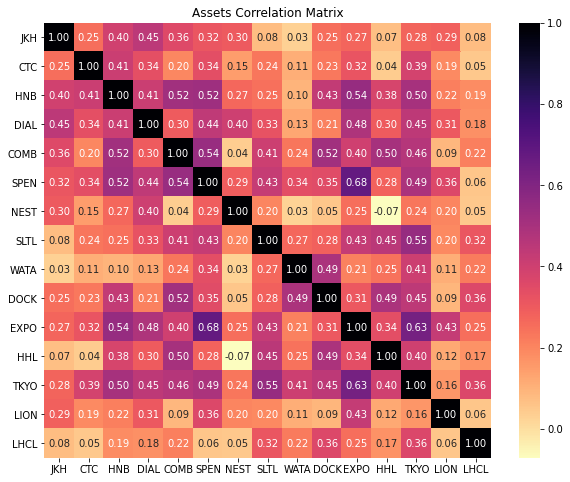

In [ ]:
#Asset Correlation Matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.pct_change().corr(method ='spearman'), ax=ax, cmap='magma_r', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix')

In [ ]:
#Calculating annualized expected return of each company according to the percentage of change

expected_return = df.resample('M').last().pct_change().mean()
expected_return

JKH    -0.046584
CTC    -0.025795
HNB    -0.054836
DIAL    0.008106
COMB   -0.011115
SPEN   -0.018453
NEST   -0.023153
SLTL    0.010527
WATA    0.031544
DOCK   -0.023344
EXPO   -0.039106
HHL    -0.027174
TKYO   -0.044075
LION   -0.003481
LHCL   -0.006714
dtype: float64

In [ ]:
w_marko = [0.030101, 0.145420, 0.103473, 0.091937, 0.022719, 0.003659, 0.111587, 0.028294, 0.101163, 0.009661, 0.025190, 0.121209, 0.033716, 0.159769, 0.012102]
portfolio_er_marko = (w_marko*expected_return).sum()
portfolio_er_marko

-0.016124627921600115

In [ ]:
portfolio_var_marko = cov_matrix.mul(w_marko, axis=0).mul(w_marko, axis=1).sum().sum()
portfolio_var_marko

0.0005965213643628396

In [ ]:
Sharpe_Ratio = (portfolio_er_marko-0.051) /(portfolio_var_marko**0.5)
Sharpe_Ratio

-2.7483300734131397

In [ ]:
A_Sharpe = (252**0.5)*Sharpe_Ratio
A_Sharpe

-43.62838736982634

In [ ]:
w_bl = [0.19350939, 0.18693763, 0.05341531, 0.09929346, 0.09389362, 0.0235263, 0.06016142, 0.05997386, 0.01128833, 0.00606597, 0.08152874, 0.04808073, 0.01897794, 0.04268007, 0.010167]
portfolio_er_bl = (w_bl*expected_return).sum()
portfolio_er_bl

-0.023533800520650884

In [ ]:
portfolio_var_bl = cov_matrix.mul(w_bl, axis=0).mul(w_bl, axis=1).sum().sum()
portfolio_var_bl

0.0008265489158485495

In [ ]:
Sharpe_Ratio = (portfolio_er_bl-0.051) /(portfolio_var_bl**0.5)
Sharpe_Ratio

-2.592501321444359

In [ ]:
A_Sharpe = (252**0.5)*Sharpe_Ratio
A_Sharpe

-41.15468262088858